STUDENT PERFORMANCE INDICATOR - EDA

In [2]:
#importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1. READING DATA FROM CSV

In [6]:
# Importing data from CSV as Pandas Dataframe

df = pd.read_csv('Data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
# Shape of Dataset

df.shape

(1000, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


DATASET INFORMATION

> The dataset has 8 columns and 1000 rows

Column Descriptions:
1. gender: Categorical with 2 unique values (Male/Female)
2. race_ethnicity: Categorical with 3 unique values (group A, group B, group C)
3. parental_level_of_education: Categorical with 6 unique values ("bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school')
4. lunch: Categorical with 2 unique values ('standard', 'free/reduced')
5. test_preparation_course': Categorical with 2 unique values ('none', 'completed')
6. math_score: int
7. reading_score: int
8. writing_score: int

## 2. DATA CHECKS FOR EDA

a. Missing values

b. Duplicates

c. Data Types

d. No. of Unique values for each categorical columns

e. Data Statistics

f. Check categories present in categorical columns

In [14]:
# Checking missing values

df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

In [15]:
# Checking duplicates in the dataset

df.duplicated().sum()

0

There are no duplicate values in the dataset

In [16]:
# Checking Datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Categorical Columns: gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course

Numerical Columns: math_score, reading_score, writing_score

In [17]:
# Checking unique values for all columns

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [18]:
# Checking descriptive statistics of numerical data

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights

- Means for scores in all three subjects is close to each other (between 66 and 69.16)

- All standard deviations are close to each other (between 14.6 and 15.19)

- While the minimum score for maths is 0, the minimum score for other subjects is higher (17 for reading & 10 for writing))

In [19]:
# Segreegating numerical and categorical features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

# Print columns

print ('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print ('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [20]:
# Adding new columns for total score and average score

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## 3. Data Visualization

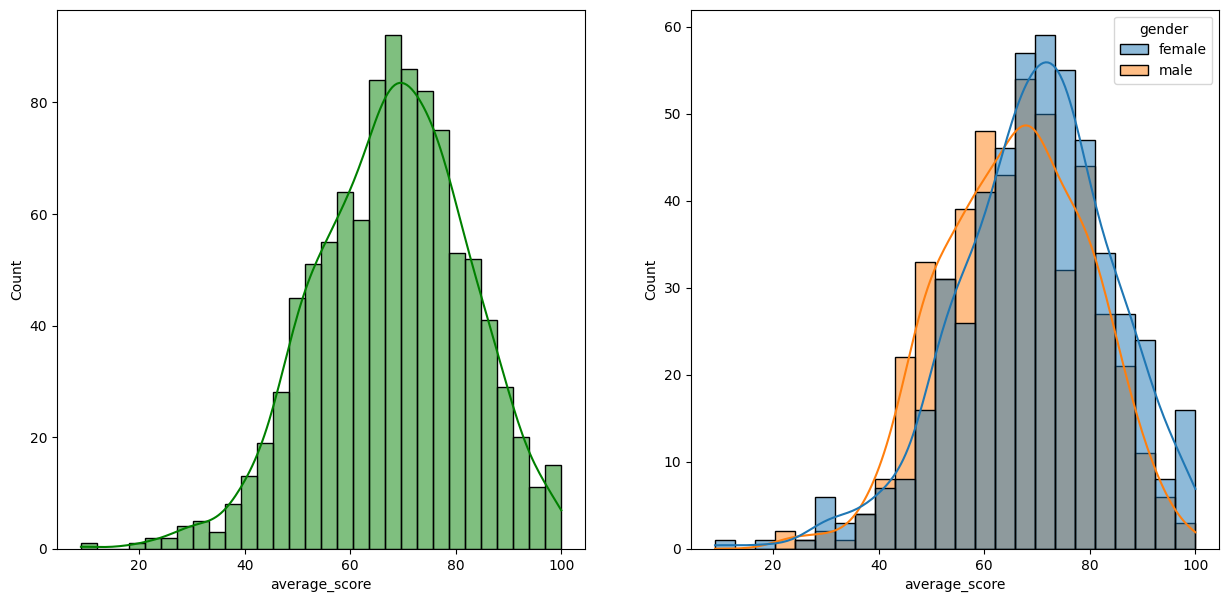

In [23]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins =30, kde= True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True, hue= 'gender' )
plt.show()

- Female students tend to perform better than male students

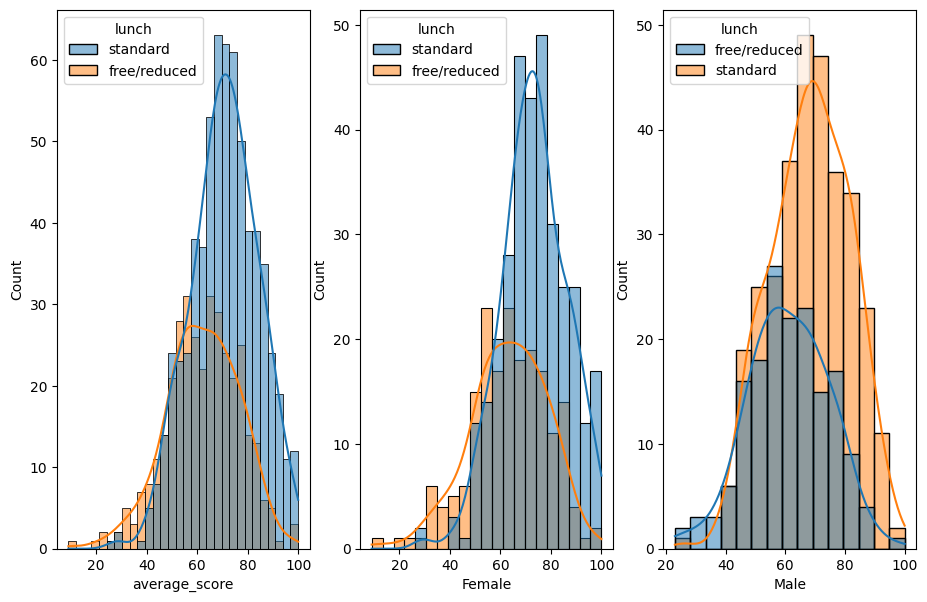

In [28]:
fig, axs = plt.subplots(1,3, figsize = (15,7))
plt.subplot(141)
sns.histplot(data=df, x= 'average_score', bins=30, kde=True, hue= 'lunch')
plt.subplot(142)
sns.histplot(data= df[df.gender=='female'], x='average_score', kde=True, hue= 'lunch')
plt.xlabel('Female')
plt.subplot(143)
sns.histplot(data= df[df.gender=='male'], x='average_score', kde=True, hue= 'lunch')
plt.xlabel('Male')
plt.show()

- Standard lunch helps perform better in exams for both male and female students compared to free/reduced lunch

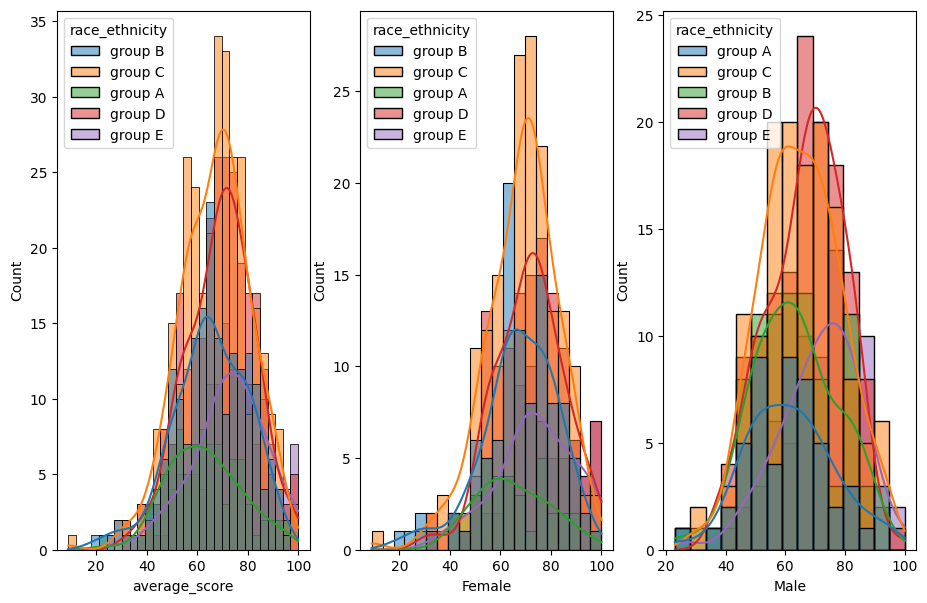

In [26]:
fig, axs = plt.subplots(1,3, figsize = (15,7))
plt.subplot(141)
sns.histplot(data=df, x= 'average_score', bins=30, kde=True, hue= 'race_ethnicity')
plt.subplot(142)
sns.histplot(data= df[df.gender=='female'], x='average_score', kde=True, hue= 'race_ethnicity')
plt.xlabel('Female')
plt.subplot(143)
sns.histplot(data= df[df.gender=='male'], x='average_score', kde=True, hue= 'race_ethnicity')
plt.xlabel('Male')
plt.show()

- Overall Group C performs best. However, the performance of males of group D is better than that of group C

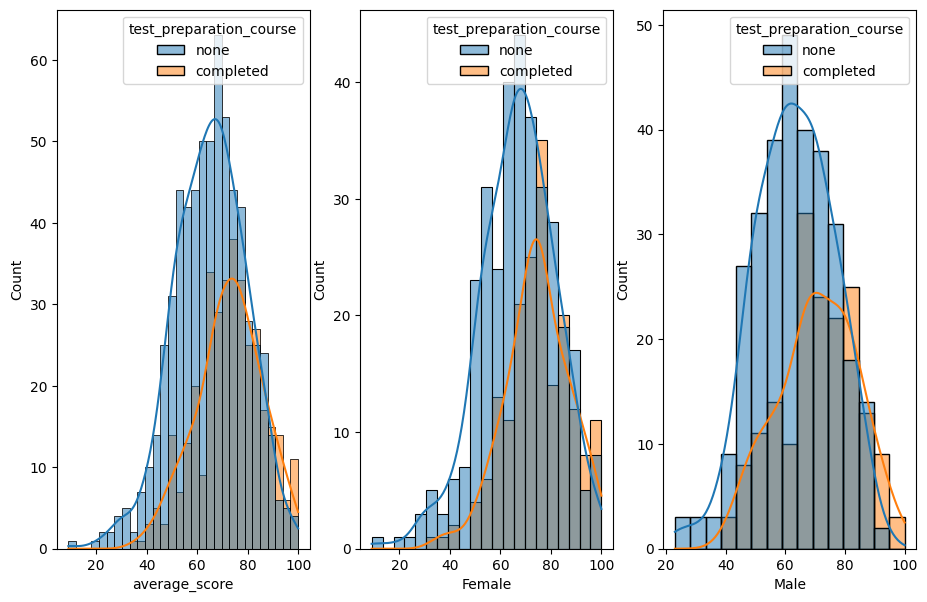

In [29]:
fig, axs = plt.subplots(1,3, figsize = (15,7))
plt.subplot(141)
sns.histplot(data=df, x= 'average_score', bins=30, kde=True, hue= 'test_preparation_course')
plt.subplot(142)
sns.histplot(data= df[df.gender=='female'], x='average_score', kde=True, hue= 'test_preparation_course')
plt.xlabel('Female')
plt.subplot(143)
sns.histplot(data= df[df.gender=='male'], x='average_score', kde=True, hue= 'test_preparation_course')
plt.xlabel('Male')
plt.show()

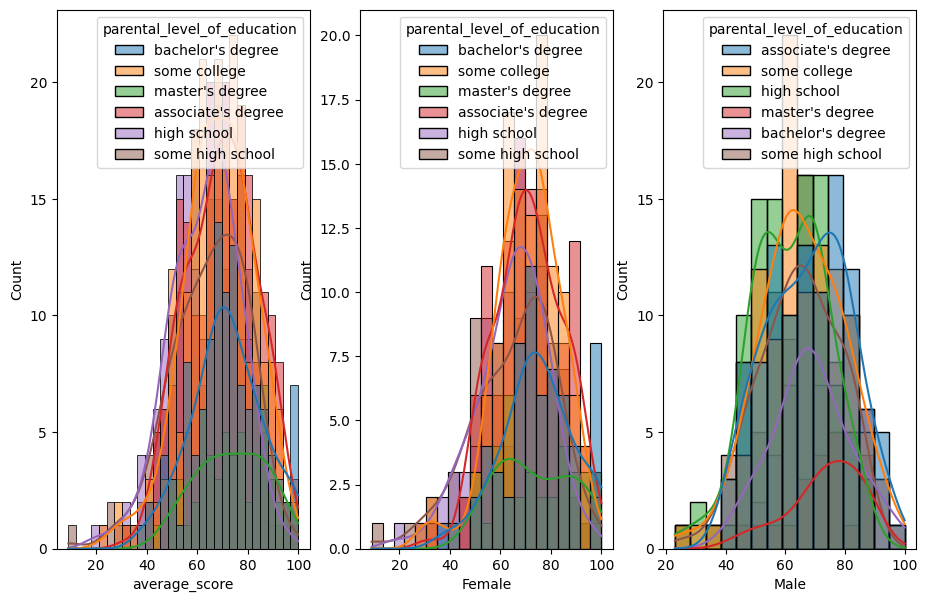

In [30]:
fig, axs = plt.subplots(1,3, figsize = (15,7))
plt.subplot(141)
sns.histplot(data=df, x= 'average_score', bins=30, kde=True, hue= 'parental_level_of_education')
plt.subplot(142)
sns.histplot(data= df[df.gender=='female'], x='average_score', kde=True, hue= 'parental_level_of_education')
plt.xlabel('Female')
plt.subplot(143)
sns.histplot(data= df[df.gender=='male'], x='average_score', kde=True, hue= 'parental_level_of_education')
plt.xlabel('Male')
plt.show()